In [1]:
# We'll need numpy for some mathematical operations
import numpy as np
import json

# Librosa for audio
import librosa

# matplotlib for displaying the output
import matplotlib.pyplot as plt
%matplotlib inline
# And seaborn to make it look nice
import seaborn
seaborn.set(style='ticks')

# and IPython.display for audio output
import IPython.display

In [2]:
audio_path = './music/sound_input.wav'

In [ ]:
input1 = []
seconds_to_get = 1221
i = 0
while i < seconds_to_get:
    y, sr = librosa.load('sound_input.wav', duration=3.0, offset=i)
    i += 3
    input1.append(y)
    
print len(input1)
print len(input1[0])



In [8]:
# look at data
sampleM = input1[2]
sampleF = input1[207]

In [104]:
# M_harmonic, M_percussive = librosa.effects.hpss(sampleM) # 13s
# F_harmonic, F_percussive = librosa.effects.hpss(sampleF) # 13s
# M_perc = librosa.feature.chroma_cqt(y=M_percussive, sr=sr) # 5s
# F_perc = librosa.feature.chroma_cqt(y=F_percussive, sr=sr) # 5s
# M_harm = librosa.feature.chroma_cqt(y=M_harmonic, sr=sr) # 5s
# F_harm = librosa.feature.chroma_cqt(y=F_harmonic, sr=sr) # 5s
M1 = librosa.cqt(y=sampleM, sr=sr, real=False)
F1 = librosa.cqt(y=sampleF, sr=sr, real=False)
M2 = librosa.feature.melspectrogram(y=sampleM, sr=22050, S=None, n_fft=128)
M3 = librosa.logamplitude(M2)
print M3
F2 = librosa.feature.melspectrogram(y=sampleM, sr=22050, S=None, n_fft=128)
# print len(M), len(F)
print M2.shape, F2.shape

[[-85.40039023 -85.40039023 -85.40039023 ..., -85.40039023 -85.40039023
  -85.40039023]
 [-85.40039023 -85.40039023 -85.40039023 ..., -85.40039023 -85.40039023
  -85.40039023]
 [-85.40039023 -85.40039023 -85.40039023 ..., -85.40039023 -85.40039023
  -85.40039023]
 ..., 
 [-58.89368119 -72.22550139 -62.53728517 ..., -82.41007178 -85.40039023
  -85.40039023]
 [-56.96248301 -71.16102504 -65.19538345 ..., -84.42702553 -84.32739868
  -84.83704889]
 [-54.76863338 -79.1607077  -76.10035807 ..., -85.40039023 -85.40039023
  -85.40039023]]
(128, 130) (128, 130)


In [105]:
# print('HAS_SAMPLERATE: ', librosa.core.audio._HAS_SAMPLERATE)
IPython.display.Audio(data=F_percussive, rate=sr)
# IPython.display.Audio(data=sampleF, rate=sr)

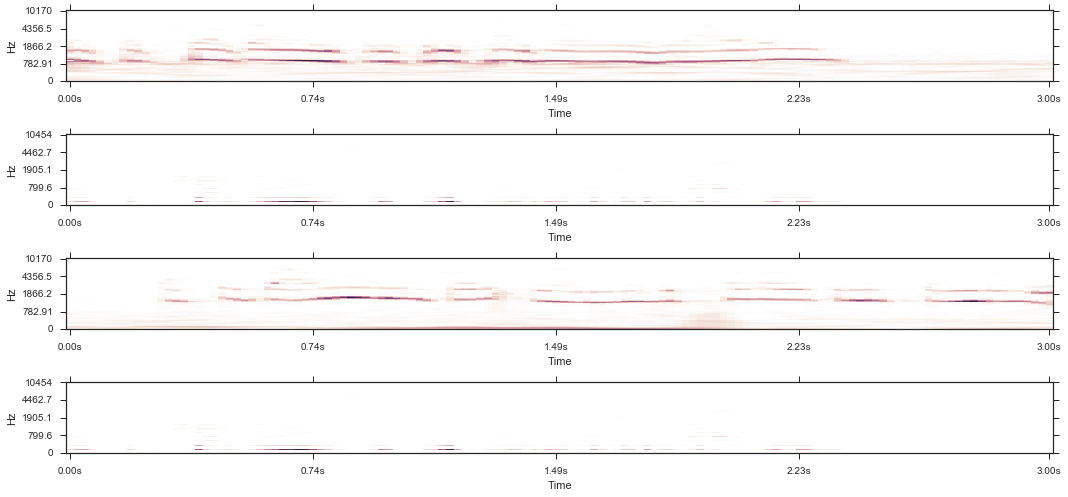

In [103]:
# Make a new figure
plt.figure(figsize=(15,10))

# sample rate and hop length parameters are used to render the time axis
# Display the spectrogram on a mel scale
# plt.subplot(6,1,1)
# plt.title('Males')
# librosa.display.specshow(M_harm, sr=sr, x_axis='time', y_axis='mel')
# plt.subplot(6,1,2)
# librosa.display.specshow(M_perc, sr=sr, x_axis='time', y_axis='mel')
# plt.subplot(6,1,1)
# librosa.display.specshow(M1, sr=sr, x_axis='time', y_axis='mel')

# plt.subplot(6,1,4)
# plt.title('Females')
# librosa.display.specshow(F_harm, sr=sr, x_axis='time', y_axis='mel')
# plt.subplot(6,1,5)
# librosa.display.specshow(F_perc, sr=sr, x_axis='time', y_axis='mel')
# plt.subplot(6,1,2)
# librosa.display.specshow(F1, sr=sr, x_axis='time', y_axis='mel')


# SHOW MEL VS CQT!!
plt.subplot(6,1,1)
librosa.display.specshow(M1, sr=sr, x_axis='time', y_axis='mel')
plt.subplot(6,1,2)
librosa.display.specshow(M2, sr=sr, x_axis='time', y_axis='mel')
plt.subplot(6,1,3)
librosa.display.specshow(F1, sr=sr, x_axis='time', y_axis='mel')
plt.subplot(6,1,4)
librosa.display.specshow(F2, sr=sr, x_axis='time', y_axis='mel')

# draw a color bar
# plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()